First we want to read our csv file containing the relevant temperature data time series to train our machine Learning model. We also perform some data cleaning below and convert relevant data in timeseries objects. We also perform a test-train sequential split of 70% training and 30% testing data

In [10]:
data <- read.csv("Desktop/weather_data_24hr_HI.csv", header = T)

In [11]:
#filter only maxtempC out which is relevant to our timeseries
data <- data[,3]
#remove NA values
data <- data[-4265]
head(data)


[1] 31 31 31 31 31 31

In [12]:
#Let's partition the data into testing and training data
training <- data[1:2990]
testing <- data[2991:4264]

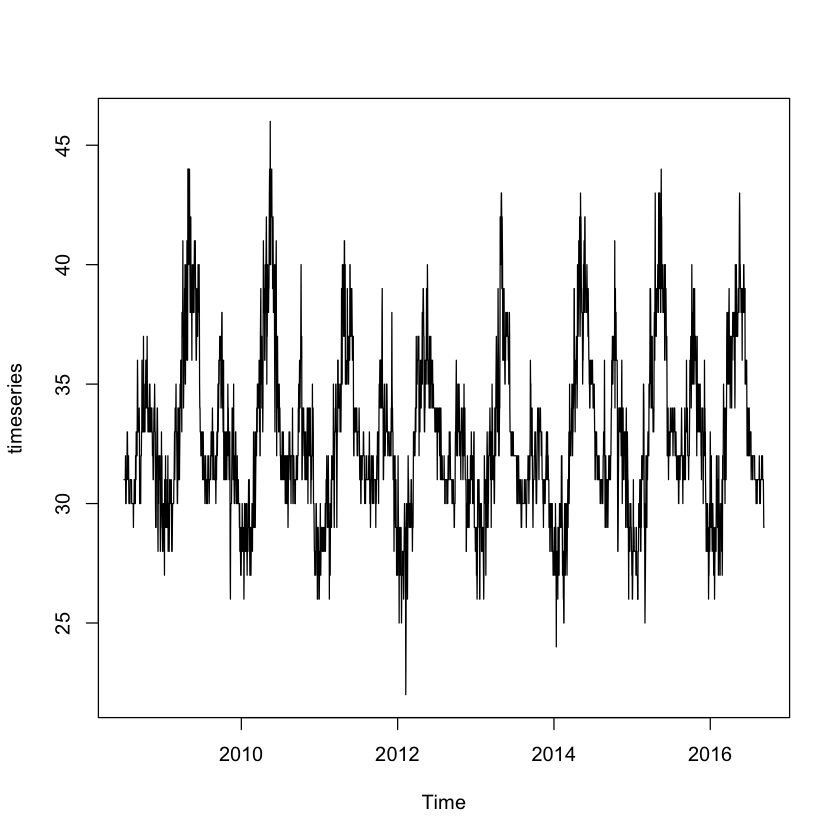

In [13]:
#Create a timeseries using the maxtempC data
timeseries <- ts(training, frequency = 365, start = c(2008,183))
timeseriestest <- ts(testing,  frequency = 365, start = c(2016, 252))
#plot the timeseries
plot.ts(timeseries)

In [15]:
library("TTR")

Now that we have clean data we need to work on using a variety of different models for our temperature time series. First we try a Simple Exponential Smoothing Model

In [29]:
#Simple exponential Smoothing
timeseriesforecasts <- HoltWinters(timeseries, beta=FALSE, gamma=FALSE, l.start = 31)


In [30]:
summary(timeseriesforecasts)
timeseriesforecasts$alpha

             Length Class  Mode     
fitted       5978   mts    numeric  
x            2990   ts     numeric  
alpha           1   -none- numeric  
beta            1   -none- logical  
gamma           1   -none- logical  
coefficients    1   -none- numeric  
seasonal        1   -none- character
SSE             1   -none- numeric  
call            5   -none- call     

[1] 0.7161745

In [20]:
a<-(timeseriesforecasts$SSE)

In [22]:
MSE<- a/length(training)

In [23]:
sqrt(MSE)

[1] 1.32604

In [24]:
testmodel<-HoltWinters(timeseriestest, alpha = 0.7159879, beta = FALSE, gamma = FALSE)
#calculate the sum of squared errors for our forecasts
a<-testmodel$SSE
#calculate the mean of the SSE
MSE<-a/length(testing)
sqrt(MSE)

[1] 1.42332

The Exponential Smoothing mdoel has an RMS error of 1.33 on training data and 1.42 on testing data. Now we try a Holts Exponential Smoothing Model:

[1] 1.7642

alpha 
0.7179257

beta 
   0

[1] FALSE

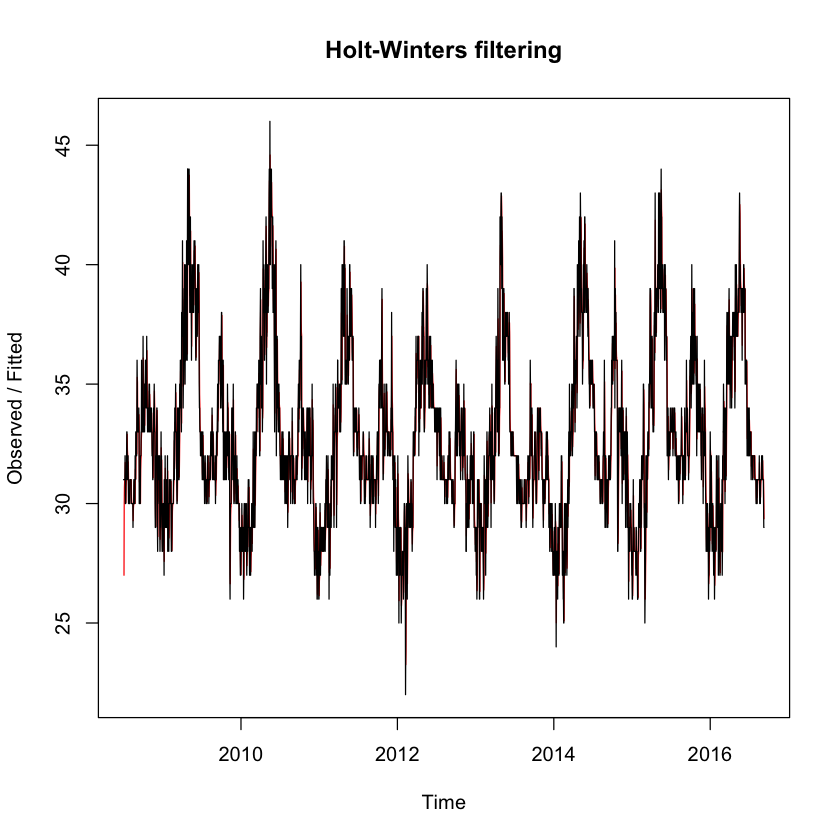

In [31]:
#Holts exponential Smoothing
timeseriesforecasts <- HoltWinters(timeseries, gamma=FALSE, l.start = 27)
plot(timeseriesforecasts)
a<-(timeseriesforecasts$SSE)
a/length(training)
timeseriesforecasts$alpha
timeseriesforecasts$beta
timeseriesforecasts$gamma

In [34]:
testmodel<-HoltWinters(timeseriestest, alpha = 0.717925706609527, beta = 0, gamma = FALSE)
#calculate the sum of squared errors for our forecasts
a<-testmodel$SSE
#calculate the mean of the SSE
MSE<-a/length(testing)
sqrt(MSE)

[1] 1.42301

Simple exponential smoothing is more accurate compared to Holts Exponential Smoothing in this case. We now try Holt Winters Exponential Smoothing

[1] 2.24357

alpha 
0.6207561

beta 
   0

gamma 
0.7161923

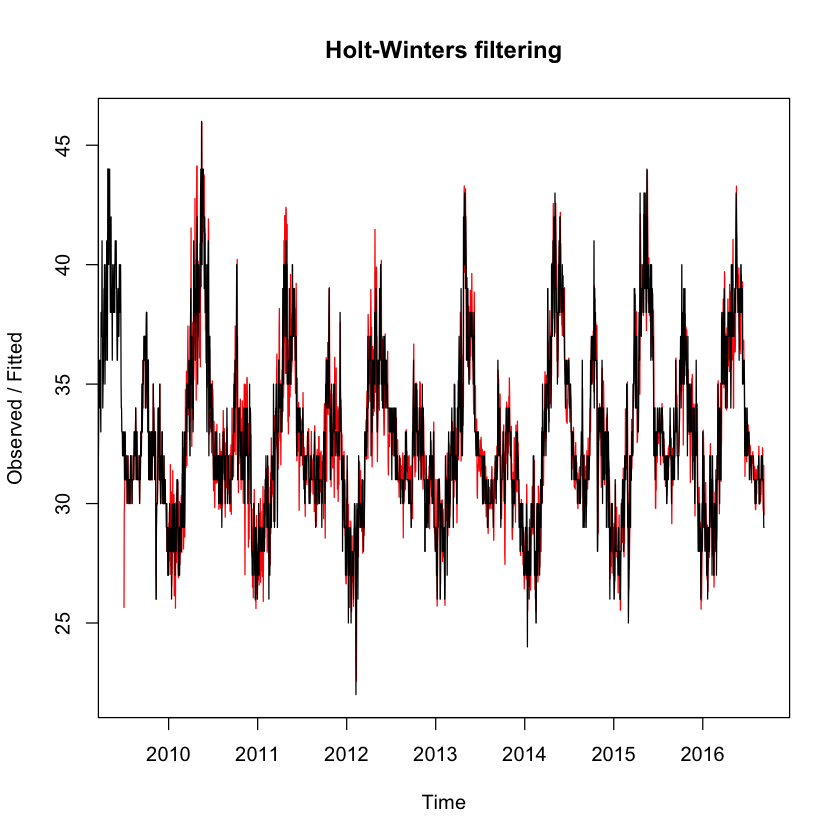

In [39]:
timeseriesforecasts <- HoltWinters(timeseries, l.start = 27)
plot(timeseriesforecasts)
a<-(timeseriesforecasts$SSE)
a/length(training)
timeseriesforecasts$alpha
timeseriesforecasts$beta
timeseriesforecasts$gamma

In [40]:
testmodel<-HoltWinters(timeseriestest, alpha = 0.620756063976745, beta = 0, gamma = 0.716192339848921)
#calculate the sum of squared errors for our forecasts
a<-testmodel$SSE
#calculate the mean of the SSE
MSE<-a/length(testing)
sqrt(MSE)

[1] 1.537565

This model also has lower accuracy than the Simple Exponential smoothing model. Thus, Simple Exponential Smoothing is the most accurate model so far. Now we try to explore the auto-correlations between temperatures.

In [41]:
training <- data[1:2990]
testing <- data[2991:4264]
tstrain <- ts(training, frequency = 365, start = c(2008,183))
tstest <- ts(testing, frequency = 365, start = c(2008,183))

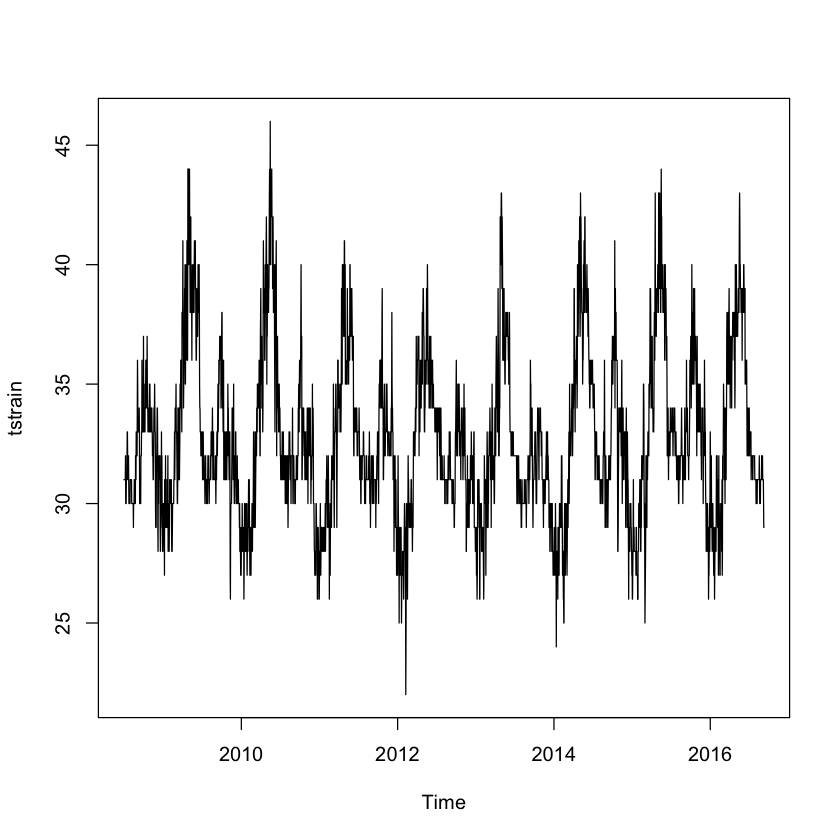

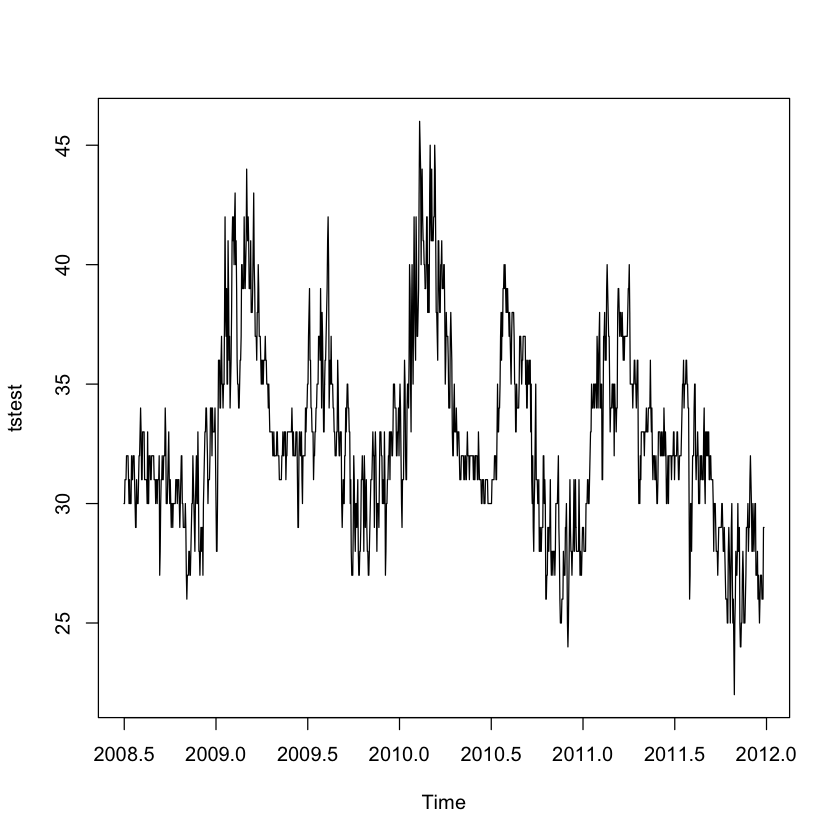

In [42]:
plot(tstrain)
plot(tstest)

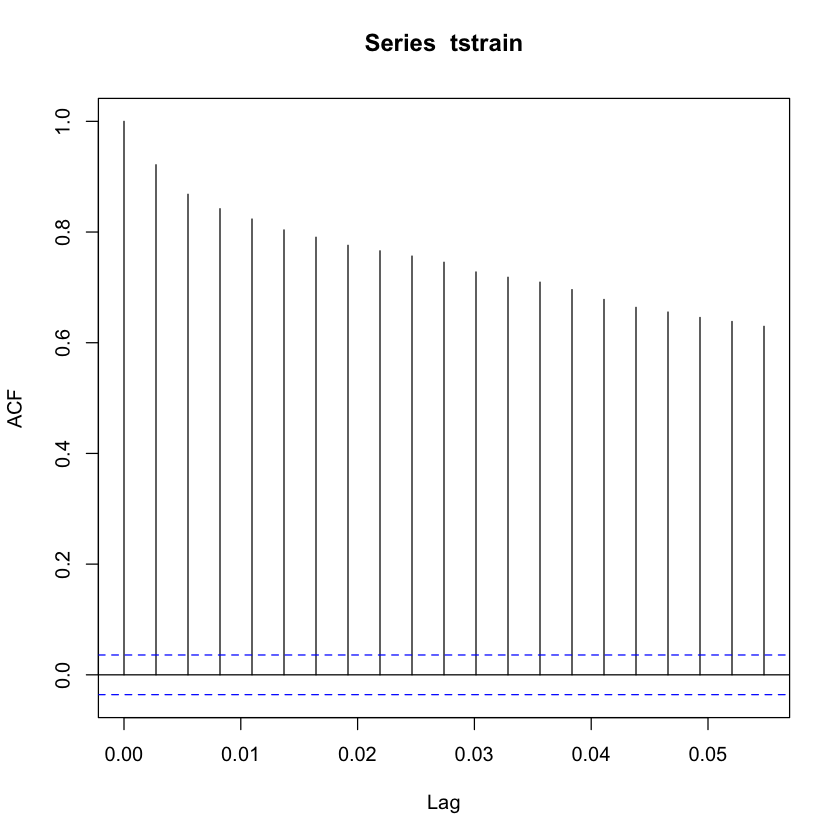

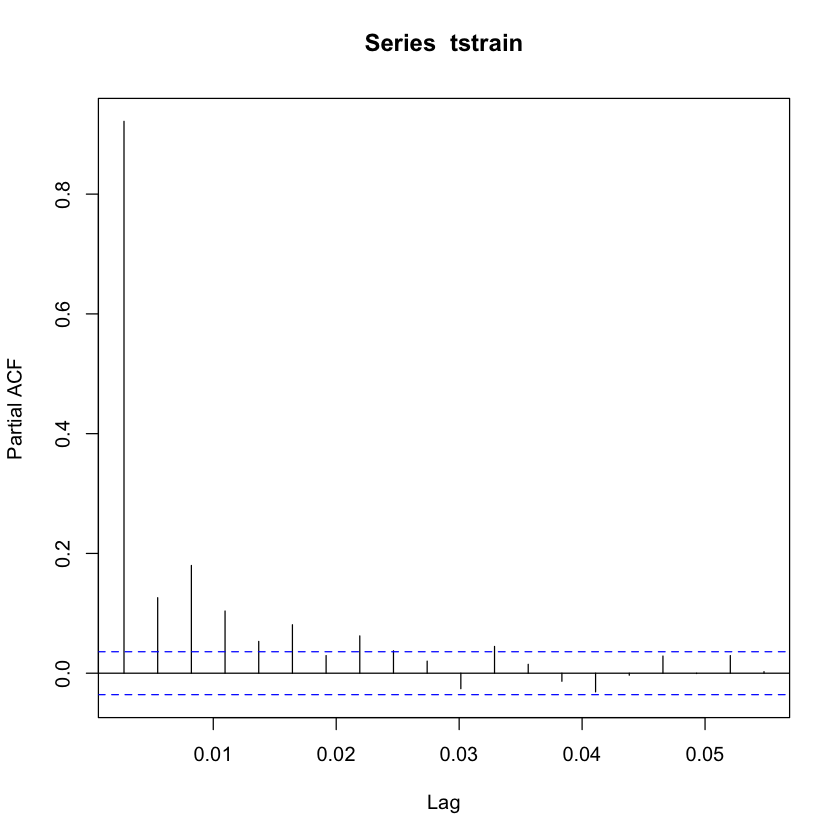

In [43]:
acf(tstrain, lag.max=20)
pacf(tstrain, lag.max=20)

ERROR: Error in garch(tstrain, c(1, 6)): could not find function "garch"
